In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv(r'C:/Users/emich/Google Drive/Data science/Capstone 3/Data/Data_Cleaned.csv',header=(0), index_col=None)
df

,Unnamed: 0,npi,money_generated,impressions_count,city,state,zipcode,sole_proprietor,specialty,total_procedures,...,hospital_size,hospital_system_membership,total_claim_count,total_drug_cost,money_generated_log,total_procedures_log,distinct_procedures_log,total_claim_count_log,total_drug_cost_log,sub_specialty_count
0,0,1003011610,0.129176,32,NEWTONVILLE,MA,02460,N,Internal Medicine,24.0,...,Medium,1.0,2238.0,183041.18,-0.888818,1.380211,0.954243,3.349860,5.262549,3.0
1,1,1003012436,0.003150,1,ISLIP,NY,11751,N,Psychiatry and Neurology,5.0,...,NaN,0.0,808.0,69750.23,-2.501689,0.698970,0.301030,2.907411,4.843546,1.0
2,2,1003015785,0.022761,1,Rutland,VT,05701,Y,Ophthalmology,21.0,...,Medium,0.0,603.0,44920.21,-1.642809,1.322219,1.079181,2.780317,4.652442,2.0
3,3,1003025461,1.270086,12,PHILADELPHIA,PA,19140,N,Internal Medicine,89.0,...,Large,1.0,1122.0,460828.57,0.103833,1.949390,1.361728,3.049993,5.663539,6.0
4,4,1003029836,0.129028,2,Stratford,NJ,08084,N,Urology,158.0,...,Medium,1.0,1798.0,218540.12,-0.889316,2.198657,1.698970,3.254790,5.339531,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7941,7942,1992944219,0.014007,5,WALNUT,CA,91789,N,Dentist,NaN,...,NaN,0.0,287.0,1828.26,-1.853655,NaN,NaN,2.457882,3.262038,NaN
7942,7943,1992956585,0.136161,22,SUGAR LAND,TX,77479,N,Dentist,NaN,...,NaN,0.0,35.0,683.65,-0.865947,NaN,NaN,1.544068,2.834834,NaN
7943,7944,1992974083,0.097616,4,HOLLYWOOD,FL,33019,N,Radiology,85.0,...,Medium,1.0,148.0,3963.87,-1.010479,1.929419,1.397940,2.170262,3.598119,1.0
7944,7945,1992978092,0.027895,5,JACKSONVILLE,FL,32256,Y,Dentist,NaN,...,NaN,0.0,70.0,728.43,-1.554474,NaN,NaN,1.845098,2.862388,NaN


# Data Preprocessing

## Missing Values

Let's see how many missing values we have in each column to make a decision on how to handle those values

In [26]:
percent_missing = df.isnull().sum() / len(df) *100
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values(by='percent_missing')

,column_name,percent_missing
Unnamed: 0,Unnamed: 0,0.000000
total_claim_count_log,total_claim_count_log,0.000000
money_generated_log,money_generated_log,0.000000
total_drug_cost,total_drug_cost,0.000000
total_claim_count,total_claim_count,0.000000
hospital_system_membership,hospital_system_membership,0.000000
is_pii_enabled,is_pii_enabled,0.000000
total_drug_cost_log,total_drug_cost_log,0.000000
cbm_id,cbm_id,0.000000
impression_cost,impression_cost,0.000000


Looks like amost half of values related to hospital location and procedures are missing. We'll drop these variables

In [27]:
df.columns

Index(['Unnamed: 0', 'npi', 'money_generated', 'impressions_count', 'city',
       'state', 'zipcode', 'sole_proprietor', 'specialty', 'total_procedures',
       'distinct_procedures', 'derived_specialty_list', 'event_ts',
       'impression_cost', 'cbm_id', 'publicationid', 'is_pii_enabled',
       'hospital_city', 'hospital_state', 'hospital_zip', 'hospital_latitude',
       'hospital_longitude', 'hospital_size', 'hospital_system_membership',
       'total_claim_count', 'total_drug_cost', 'money_generated_log',
       'total_procedures_log', 'distinct_procedures_log',
       'total_claim_count_log', 'total_drug_cost_log', 'sub_specialty_count'],
      dtype='object')

In [28]:
df = df.drop(['Unnamed: 0','distinct_procedures_log', 'total_procedures_log', 'distinct_procedures', 'total_procedures', 
              'hospital_latitude', 'hospital_zip', 'hospital_state', 'hospital_city', 'hospital_size',
              'hospital_longitude'], axis=1)
df.columns

Index(['npi', 'money_generated', 'impressions_count', 'city', 'state',
       'zipcode', 'sole_proprietor', 'specialty', 'derived_specialty_list',
       'event_ts', 'impression_cost', 'cbm_id', 'publicationid',
       'is_pii_enabled', 'hospital_system_membership', 'total_claim_count',
       'total_drug_cost', 'money_generated_log', 'total_claim_count_log',
       'total_drug_cost_log', 'sub_specialty_count'],
      dtype='object')

Let's impute missing values. For speicalty_counts, a discrete variable, the strategy will be 'median', for the categotical - 'most frequent'

In [29]:
#from sklearn.impute import SimpleImputer
print(df['sub_specialty_count'].median())
print(df['state'].value_counts())
print(df['sole_proprietor'].value_counts())
#= SimpleImputer(missing_values='NaN', strategy='median')
#df[['sole_proprietor', 'state']] = SimpleImputer(missing_values='NaN', strategy='most_frequent')
#percent_missing = df.isnull().sum() / len(df) *100
#missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 #'percent_missing': percent_missing})
#missing_value_df.sort_values(by='percent_missing')

2.0
CA    888
NY    696
TX    576
FL    463
PA    382
IL    377
MA    336
OH    290
NJ    273
MI    267
NC    233
VA    221
MD    201
GA    176
WA    155
MN    154
TN    152
CO    138
AZ    136
MO    130
CT    122
WI    119
IN    117
OR    106
SC     88
KY     84
LA     77
UT     67
AL     67
KS     61
IA     57
OK     53
NV     49
DC     47
NH     43
RI     41
MS     40
AR     36
ID     36
HI     34
WV     34
NM     34
ME     32
NE     29
DE     27
PR     24
MT     23
ND     19
SD     17
VT     17
AK     14
WY      9
BC      2
ON      1
AP      1
Name: state, dtype: int64
N    5599
Y    2328
Name: sole_proprietor, dtype: int64


In [30]:
df['sub_specialty_count'] = df['sub_specialty_count'].fillna(2)
df['state'] = df['state'].fillna('CA')
df['sole_proprietor'] = df['sole_proprietor'].fillna('N')

## Categorical Variables

First let's examine the key categorical variables and group values with low counts

In [31]:
print(df['specialty'].value_counts())

Dentist                                  1865
Internal Medicine                        1022
Emergency Medicine                        673
Psychiatry and Neurology                  572
Family Medicine                           560
Surgery                                   377
Student                                   349
Ophthalmology                             335
Dermatology                               328
Obstetrics and Gynecology                 268
Cardiology                                256
Urology                                   171
Nurse/PA/Technician                       167
Gastroenterology                          139
Nephrology                                 88
Radiology                                  81
Anesthesiology                             71
Hematology and Oncology                    68
Otolaryngology                             60
Physical Therapist                         58
Pediatrics                                 55
Pharmacist                        

Let's group all specialties where values <20 into 'Other' category:

In [32]:
s = df['specialty'].value_counts()
df['specialty'] = np.where(df['specialty'].isin(s.index[s >= 20]), df['specialty'], 'Other')
print(df['specialty'].value_counts())

Dentist                      1865
Internal Medicine            1022
Emergency Medicine            673
Psychiatry and Neurology      572
Family Medicine               560
Surgery                       377
Student                       349
Ophthalmology                 335
Dermatology                   328
Obstetrics and Gynecology     268
Cardiology                    256
Urology                       171
Nurse/PA/Technician           167
Gastroenterology              139
Nephrology                     88
Radiology                      81
Anesthesiology                 71
Hematology and Oncology        68
Other                          65
Otolaryngology                 60
Physical Therapist             58
Pediatrics                     55
Pharmacist                     52
Pulmonolgy                     52
Endocrinology                  51
Hospitalist                    45
Infectious Disease             31
Allergy and Immunology         31
Rheumatology                   29
General Practi

Let's do the same for the Publication column:

In [33]:
s = df['publicationid'].value_counts()
df['publicationid']= np.where(df['publicationid'].isin(s.index[s >= 20]), df['publicationid'],'OtherPub')
print(df['publicationid'].value_counts())

AMA           3596
ADA           1898
ACEP           410
APA            276
AAD            245
AOA            196
ACC            183
AUA            169
CCF            154
AMAWEEKEND     128
AGA            106
ASCO            98
OtherPub        86
ASN             78
ASHP            67
ATS             64
ACOG            59
ENDO            58
ACPE            28
SEMPA           25
TMA             22
Name: publicationid, dtype: int64


Now, let's create dummies for specialty. 

In [34]:
dummy = pd.get_dummies(df, columns=['publicationid','specialty','state','sole_proprietor'], drop_first=True, prefix = 'DM')
print(list(dummy.columns))

['npi', 'money_generated', 'impressions_count', 'city', 'zipcode', 'derived_specialty_list', 'event_ts', 'impression_cost', 'cbm_id', 'is_pii_enabled', 'hospital_system_membership', 'total_claim_count', 'total_drug_cost', 'money_generated_log', 'total_claim_count_log', 'total_drug_cost_log', 'sub_specialty_count', 'DM_ACC', 'DM_ACEP', 'DM_ACOG', 'DM_ACPE', 'DM_ADA', 'DM_AGA', 'DM_AMA', 'DM_AMAWEEKEND', 'DM_AOA', 'DM_APA', 'DM_ASCO', 'DM_ASHP', 'DM_ASN', 'DM_ATS', 'DM_AUA', 'DM_CCF', 'DM_ENDO', 'DM_OtherPub', 'DM_SEMPA', 'DM_TMA', 'DM_Anesthesiology', 'DM_Cardiology', 'DM_Dentist', 'DM_Dermatology', 'DM_Emergency Medicine', 'DM_Endocrinology', 'DM_Family Medicine', 'DM_Gastroenterology', 'DM_General Practice', 'DM_Hematology and Oncology', 'DM_Hospitalist', 'DM_Infectious Disease', 'DM_Internal Medicine', 'DM_Nephrology', 'DM_Nurse/PA/Technician', 'DM_Obstetrics and Gynecology', 'DM_Ophthalmology', 'DM_Other', 'DM_Otolaryngology', 'DM_Pediatrics', 'DM_Pharmacist', 'DM_Physical Therapist

# Scaling &Training

In [35]:
import sklearn
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Splitting Data into Train and Test

In [47]:
y = dummy['money_generated_log']
X = dummy[['hospital_system_membership',
 'total_claim_count_log',
 'total_drug_cost_log',
 'sub_specialty_count',
 'DM_ACC',
 'DM_ACEP',
 'DM_ACOG',
 'DM_ACPE',
 'DM_ADA',
 'DM_AGA',
 'DM_AMA',
 'DM_AMAWEEKEND',
 'DM_AOA',
 'DM_APA',
 'DM_ASCO',
 'DM_ASHP',
 'DM_ASN',
 'DM_ATS',
 'DM_AUA',
 'DM_CCF',
 'DM_ENDO',
 'DM_OtherPub',
 'DM_SEMPA',
 'DM_TMA',
 'DM_Anesthesiology',
 'DM_Cardiology',
 'DM_Dentist',
 'DM_Dermatology',
 'DM_Emergency Medicine',
 'DM_Endocrinology',
 'DM_Family Medicine',
 'DM_Gastroenterology',
 'DM_General Practice',
 'DM_Hematology and Oncology',
 'DM_Hospitalist',
 'DM_Infectious Disease',
 'DM_Internal Medicine',
 'DM_Nephrology',
 'DM_Nurse/PA/Technician',
 'DM_Obstetrics and Gynecology',
 'DM_Ophthalmology',
 'DM_Other',
 'DM_Otolaryngology',
 'DM_Pediatrics',
 'DM_Pharmacist',
 'DM_Physical Therapist',
 'DM_Psychiatry and Neurology',
 'DM_Pulmonolgy',
 'DM_Radiology',
 'DM_Rheumatology',
 'DM_Student',
 'DM_Surgery',
 'DM_Urology']]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [49]:
print(X_test)

      hospital_system_membership  total_claim_count_log  total_drug_cost_log  \
803                          0.0               1.826075             3.279058   
5293                         0.0               1.230449             2.807264   
4619                         1.0               1.707570             2.719837   
7724                         0.0               1.672098             2.460657   
4730                         0.0               2.778874             3.899616   
...                          ...                    ...                  ...   
1344                         0.0               2.766413             4.384575   
4923                         1.0               3.311966             5.766615   
7137                         0.0               2.866878             4.631443   
2366                         0.0               3.302980             5.155573   
6149                         0.0               2.380211             3.105088   

      sub_specialty_count  DM_ACC  DM_A

## Pipeline for Scaling and Training

In [72]:
steps = [('scaler', StandardScaler()),
        ('reg', LinearRegression())]
pipeline = Pipeline(steps)


model1_results = pipeline.fit(X_train, y_train)
#why do we use prediction space? how do I get test results to assess model performance?

In [73]:
print(model1_results.score(X_train, y_train))

0.37961334071614017


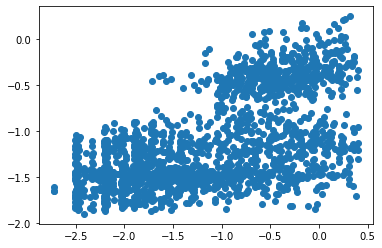

In [74]:
y_pred = pipeline.predict(X_test)
plt.scatter(y_test, y_pred)

In [76]:
print(model1_results.score(X_test, y_test))


0.34443623560446346


In [77]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
803,-1.014762,-1.219601
5293,-2.483861,-1.402695
4619,-1.423659,-1.431123
7724,-1.637404,-1.484419
4730,-0.934054,-0.498886
...,...,...
1344,-0.820477,-0.384294
4923,-2.500176,-1.084801
7137,-0.456946,-0.346365
2366,-1.722849,-1.008906


In [79]:
coeff_df = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])
coeff_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
DM_Infectious Disease,0.454212
DM_General Practice,0.349105
DM_Hospitalist,0.319539
DM_Rheumatology,0.249132
DM_Family Medicine,0.237659
DM_Other,0.214300
DM_Internal Medicine,0.206391
DM_Nephrology,0.172268
DM_Gastroenterology,0.159454
DM_Hematology and Oncology,0.151846


Our initial model explained about 38% of the variance in Money Generated by each recipient which dropped to 34.4% when applied to the test data. Among the specialties doctors in Infectious Disease, General Practice and Hospitalists tend to drive more money than others. Among the publications, only ASCO and AUA were positively yet weakly associated with the amount of revenue a recipient drives to BH, whereas membership in AMA, ADA, and ADA weekend tended to decrease the amount of revenue driven by a recipient. 